# Contents
- Introduction


- Exploratory Analysis using Python


- Data Cleaning


- Questions to ask


- Analysis


- Conclusions


- Limitations


- Resources

***

# Introduction
The dataset I chose was the Kaggle No Show Appointments dataset. I chose it because I believe that analyzing this type of dataset can achieve a level of  impact and improve people’s lives even a little bit by decreasing the percentage of people who miss their follow-ups (making them vulnerable to infections & inflammations).

I will analyze this dataset by trying to answer the questions in the third section. I hope that by the end of this analysis that I'll be able to give clear recommendations that may improve the percentage of appointment show-up.

***

# Exploratory Analysis using Python
- Determine number of records
- Determine % of shows to no-shows
- Describe some columns
- Decide which questions to ask

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("no_shows_dataset_for_python.csv")


total = df.shape[0]
print("The Number of records is:", total, "\n")


no_shows = df[df.No_show == 'Yes'].shape[0]
print("The Number of No-shows is:", no_shows, "\n")


print("The percentage of no shows is:", no_shows/total *100, "\n")


df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])    
df['AppointmentYear'] = df['AppointmentDay'].dt.year
df['AppointmentMonth'] = df['AppointmentDay'].dt.month
df['AppointmentWeekday'] = df['AppointmentDay'].dt.weekday


print(df.columns, "\n")
print(df.dtypes)


#df.describe(include='all',datetime_is_numeric=True)

df_noshows = df[df.No_show == 'Yes']

df_noshows.describe(include='all',datetime_is_numeric=True)

The Number of records is: 110527 

The Number of No-shows is: 22319 

The percentage of no shows is: 20.193255946510806 

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No_show',
       'AppointmentYear', 'AppointmentMonth', 'AppointmentWeekday'],
      dtype='object') 

PatientId                           int64
AppointmentID                       int64
Gender                             object
ScheduledDay                       object
AppointmentDay        datetime64[ns, UTC]
Age                                 int64
Neighbourhood                      object
Scholarship                         int64
Hipertension                        int64
Diabetes                            int64
Alcoholism                          int64
Handcap                             int64
SMS_received                        int64
No_show                  

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show,AppointmentYear,AppointmentMonth,AppointmentWeekday
count,2.231900e+04,2.231900e+04,22319,22319,22319,22319.000000,22319,22319.000000,22319.000000,22319.000000,22319.000000,22319.000000,22319.000000,22319,22319.0,22319.000000,22319.000000
unique,NaN,NaN,2,21180,NaN,NaN,80,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN
top,NaN,NaN,F,2016-04-25T17:17:46Z,NaN,NaN,JARDIM CAMBURI,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN
freq,NaN,NaN,14594,21,NaN,NaN,1465,NaN,NaN,NaN,NaN,NaN,NaN,22319,NaN,NaN,NaN
mean,1.467523e+14,5.652259e+06,NaN,NaN,2016-05-18 11:55:54.182534912+00:00,34.317667,NaN,0.115507,0.169004,0.064071,0.030333,0.020297,0.438371,NaN,2016.0,5.190376,1.861419
min,5.628261e+06,5.122866e+06,NaN,NaN,2016-04-29 00:00:00+00:00,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,2016.0,4.000000,0.000000
25%,4.176780e+12,5.614192e+06,NaN,NaN,2016-05-09 00:00:00+00:00,16.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,2016.0,5.000000,1.000000
50%,3.156790e+13,5.657916e+06,NaN,NaN,2016-05-17 00:00:00+00:00,33.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,2016.0,5.000000,2.000000
75%,9.454270e+13,5.703175e+06,NaN,NaN,2016-05-31 00:00:00+00:00,51.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN,2016.0,5.000000,3.000000
max,9.996580e+14,5.789986e+06,NaN,NaN,2016-06-08 00:00:00+00:00,115.000000,NaN,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,NaN,2016.0,6.000000,5.000000


In [5]:
import pandas as pd

df = pd.read_csv("no_shows_dataset_for_python.csv")

column_name = 'Scholarship'

def get_df(column_name):
    # takes the column name, creates a df based on filtered records, and returns df & the number of records in said df
    
    df2 = df[df.column_name ==1]
    total = df2.shape[0]
    
    return df2, total


# Data Cleaning & Manipulation
- The age column had a lot of suspicious values (zeros and very small values); however, I have decided to keep all records at least up to the age analysis section, since removing them will remove a lot of data and there is no way to get a confirmation re their accuracy, or update their values ip applicable. If I believe that these values are skewing the histogram, I will reconsider this decision.


- I updated the original label for the 'No show' column to be No_show for faster use in the original csv file before creating the pandas dataframe. I've also saved the original csv as a .xlsx flat file database (since the number of records can be comfortably accomodated by MS Excel) to be able to do some analysis using pivot tables, export tables, and create some trend line visualizations.


- I've finally split the AppointmentDay column to three new columns: year, month, weekday to consider some analysis re the current trend and the weekday corresponding to the appointment.

***

# Questions to Ask
Based on the exploratory data analysis and understanding the data's attributes

['PatientId', 'AppointmentID', 
'Gender', 
'ScheduledDay','AppointmentDay', 
'Age', 
'Neighbourhood', 
'Scholarship', 
'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 
'SMS_received', 'No-show']

The following questions arise:

Q1) Based on all records, what is the percentage of patients who miss their followup appointments?


Q2) Do certain patients miss too many appointments?


Q3) What is the average appointment missed per patient?


Q4) Does gender affect missing appointments? (females missing more appointments than males or vice versa)


Q5) Does the clinic schedule followups on specfic days of the week or is it a fixed time after the original appointment?


Q6) Is a certain age group more likely to miss follow-up appointments? What is the percentage of show to no-show per age group?


Q7) Is a certain neighbourhood more likely to miss their follow-ups? What is the percentage of show to no-show per neighbourhood?


Q8) Assuming that "Scholarship" signifies that the patient received free dental care, is this patient more likely to show up to their appointment?


Q9) Does the clinic's SMS service have a notable effect on patients showing up or not?


Q10) Over the years does there seem to be an upward or a downward trend for the percentage of missed appointments?

***

# Analysis

### Q1) 
Based on all records, what is the percentage of patients who miss their followup appointments?

In [24]:
total = df.shape[0]
print("The Number of records is:", total, "\n")


no_shows = df[df.No_show == 'Yes'].shape[0]
print("The Number of No-shows is:", no_shows, "\n")


print("The percentage of no shows is:", no_shows/total *100, "\n")

The Number of records is: 110527 

The Number of No-shows is: 22319 

The percentage of no shows is: 20.193255946510806 



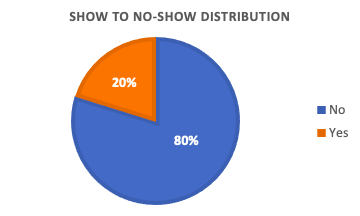

### Findings: 
Looking at all records with no specific filters applied, it seems that 20% of patients miss their follow-up appointments. Without any change to the clinic's operations, it could be expected that 20% of future patients would miss their followups as well.

### Q2)
Do certain patients miss too many appointments?


### Q3)
What is the average appointment missed per patient?

In [31]:
import pandas as pd

df = pd.read_csv("no_shows_dataset_for_python.csv")
df_noshows = df[df.No_show == 'Yes']

no_shows = df[df.No_show == 'Yes'].shape[0]
print("The Total Number of No-show records is:", no_shows, "\n")

print("Records with highest reoccurrence:\n")

print(df_noshows.PatientId.value_counts())

unique_noshows_IDs = df_noshows.PatientId.value_counts().shape[0]

print("\nThe number of unique PatientIds is:", unique_noshows_IDs)

print("\nThe average no. of missed appointments per patient is:", round(no_shows/unique_noshows_IDs))

The Total Number of No-show records is: 22319 

Records with highest reoccurrence:

1421990000000      18
563514000000000    16
5587790000000      15
581197000000000    14
65751400000000     13
                   ..
582999000000000     1
1385550000000       1
912888000000000     1
35497500000000      1
74755000000000      1
Name: PatientId, Length: 17622, dtype: int64

The number of unique PatientIds is: 17622

The average no. of missed appointments per patient is: 1


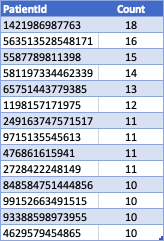

### Findings:
The above 14 patients with their respective patientIds have missed their appointments 10 times or more - could be a good idea to contact them to try and understand why.
On average, every patient has missed 1 appointment.

### Q4) 
Does gender affect missing appointments? (females missing more appointments than males or vice versa)

In [3]:
import pandas as pd

df = pd.read_csv("no_shows_dataset_for_python.csv")
df_noshows = df[df.No_show == 'Yes']


unique_IDs = df.PatientId.value_counts().shape[0]

print("The number of unique Patients is:", unique_IDs, "\n")

unique_noshows_IDs = df_noshows.PatientId.value_counts().shape[0]

print("The number of unique no-show Patients is:", unique_noshows_IDs, "\n")



females_total = df[df.Gender == 'F'].shape[0]
print("The total number of female records is: ", females_total)

females_noshows = df_noshows[df.Gender == 'F'].shape[0]
print("The total number of female no-show records is: ", females_noshows)

print("The percentage of female no-shows is: ", females_noshows/females_total*100, "\n")



males_total = df[df.Gender == 'M'].shape[0]
print("The total number of male records is: ", males_total)

males_noshows = df_noshows[df.Gender == 'M'].shape[0]
print("The total number of male no-show records is: ", males_noshows)

print("The percentage of male no-shows is: ", males_noshows/males_total*100)


The number of unique Patients is: 61744 

The number of unique no-show Patients is: 17622 

The total number of female records is:  71840
The total number of female no-show records is:  14594
The percentage of female no-shows is:  20.31458797327394 

The total number of male records is:  38687
The total number of male no-show records is:  7725
The percentage of male no-shows is:  19.967947889471915


<ipython-input-3-75d2f18bc9c0>:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  females_noshows = df_noshows[df.Gender == 'F'].shape[0]
<ipython-input-3-75d2f18bc9c0>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  males_noshows = df_noshows[df.Gender == 'M'].shape[0]


### Findings:
Considering all records/instances of missed appointments (and not unique patient IDs), both Females and Males miss their appointments in a nearly equal percentage (20.31% and 19.97% respectively).

### Q5)
Does the clinic schedule followups on specfic days of the week or is it a fixed time after the original appointment?

The below visualization was prepared using the excel file included in the .zip folder "no_shows_dataset_for_analysis".

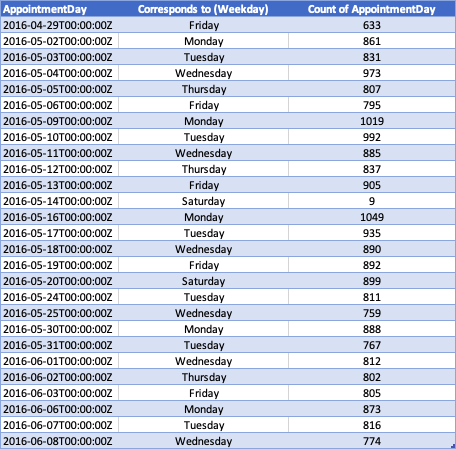

### Findings:
It doesn't seem that a particular weekday affects the no-show count.

### Q6) 
Is a certain age group more likely to miss follow-up appointments? What is the percentage of show to no-show per age group?

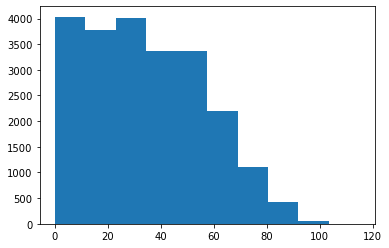

In [48]:
import matplotlib.pyplot as plt

x = df_noshows.Age
plt.hist(x, bins = 10)
plt.show()

### Findings:
It is unclear at this point whether a particular age group is more likely to skip followups. Also, the accuracy of the data re very young ages is not clear.

### Q7)
Is a certain neighbourhood more likely to miss their follow-ups? What is the percentage of show to no-show per neighbourhood?

The below visualizations were prepared using the excel file included in the .zip folder "no_shows_dataset_for_analysis".

- Based on record count only, it initially seems that 'Jardim Camburi' has the most no-show occurences.

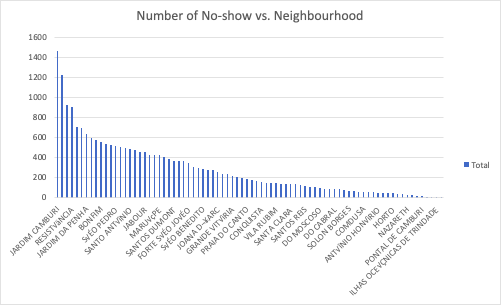

- However, upon examining the percentage of show to no-show of the top 10 neighbourhoods with the most number of records, it seems that making a decision based on count is not the most accurate metric for performance and considering percentages would be better.

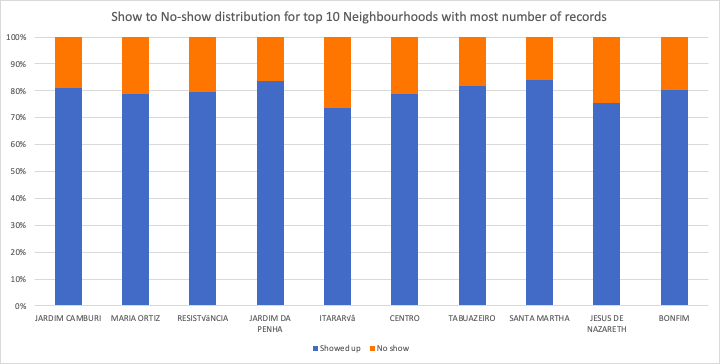

- This led to summarizing each neighbourhood's performance in the table below:


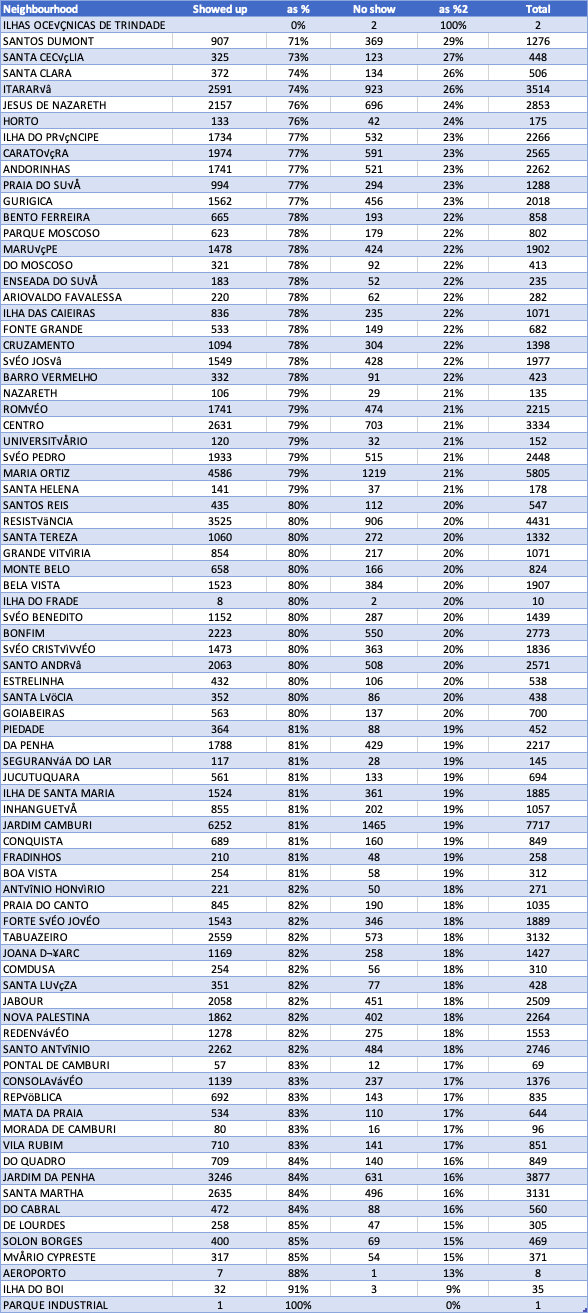

### Findings:
'Jardim Camburi' neighbourhood has the highest number of follow-up appointment no show by COUNT (1465 cases). However, this is not an accurate representation of no-show behaviour as this is simply because this neighbourhood has the biggest population on our dataset. A better approach is to consider the percentage that each no-show makes up of the total neighbourhood's population. The results are sorted by % no show in descending order, which reveals that the neighbourhood with the highest number of no-shows is 'Santos Dumont' topping the list at 29%.

### Q8)
Assuming that "Scholarship" signifies that the patient received free dental care, is this patient more likely to show up to their appointment?

In [2]:
import pandas as pd

df = pd.read_csv("no_shows_dataset_for_python.csv")

df_scholarship = df[df.Scholarship == 1]

total_scholarship = df_scholarship.shape[0]
print("The number of patient occurences who received a scholarship is: ", total_scholarship)

scholarship_showedup = df_scholarship[df.No_show == 'No'].shape[0]
print("The number of patient occurences who received a scholarship and showed up to their appointment is: ", scholarship_showedup)

print("Out of patient occurrences that received a scholarship, ", round(scholarship_showedup/total_scholarship*100), "% showed up to their appointment.")


The number of patient occurences who received a scholarship is:  10861
The number of patient occurences who received a scholarship and showed up to their appointment is:  8283
Out of patient occurrences that received a scholarship,  76 % showed up to their appointment.


<ipython-input-2-24f57fa81c28>:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  scholarship_showedup = df_scholarship[df.No_show == 'No'].shape[0]


### Findings:
It seems that patients who receive a 'scholarship' or probono treatment are not more keen to keep up with their followups. The average percentage for no-shows for the clinic is 20% and for this group it is 24%.

### Q9) 
Does the clinic's SMS service have a notable effect on patients showing up or not?

In [53]:
import pandas as pd

df = pd.read_csv("no_shows_dataset_for_python.csv")
df_noshows = df[df.No_show == 'Yes']
df_shows = df[df.No_show == 'No']

total_showup = df_shows.shape[0]
print("The number of patient occurences who showed up to their appointment is: ", total_showup)

received_showedup = df_shows[df.SMS_received == 1].shape[0]
print("The number of patient occurences who received an SMS and showed up to their appointment is: ", received_showedup)

notreceived_showedup = df_shows[df.SMS_received == 0].shape[0]
print("The number of patient occurences who did not receive an SMS and showed up to their appointment is: ", notreceived_showedup)

print("Out of all patient occurrences that showed up, ", round(received_showedup/total_showup*100), "% received an SMS.")


The number of patient occurences who showed up to their appointment is:  88208
The number of patient occurences who received an SMS and showed up to their appointment is:  25698
The number of patient occurences who did not receive an SMS and showed up to their appointment is:  62510
Out of all patient occurrences that showed up,  29 % received an SMS.


<ipython-input-53-afb2ecd1692c>:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  received_showedup = df_shows[df.SMS_received == 1].shape[0]
<ipython-input-53-afb2ecd1692c>:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  notreceived_showedup = df_shows[df.SMS_received == 0].shape[0]


### Findings:
The clinic's SMS service does not seem to have direct correlation with encouraging patients to attend follow-up appointments. Only 29% of patient occurrences of attending appointments received an SMS. This indicated that patients who intend to attend their follow-ups still do even if they receive no SMS reminder.

### Q10) 
Over the years does there seem to be an upward or a downward trend for the percentage of missed appointments?

The below visualization was prepared using the excel file included in the .zip folder "no_shows_dataset_for_analysis". 

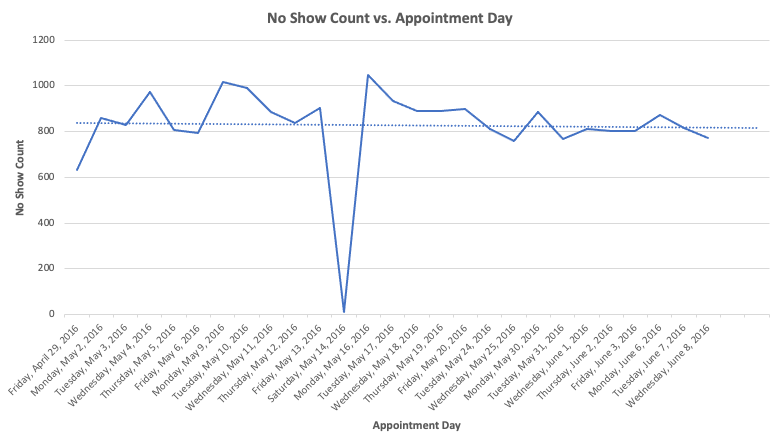

### Findings:
Over the course of the two months that the dataset covers, there doesn't seem to be an upward or downward trend for the number of no shows. 

***

# Conclusions
- Looking at all records with no specific filters applied, it seems that 20% of patients miss their follow-up appointments. Without any change to the clinic's operations, it could be expected that 20% of future patients would miss their followups as well.


- The 14 patients observed in Q2 have missed their appointments 10 times or more - could be a good idea to contact them to try and understand why. 


- On average, every patient has missed 1 appointment.


- Considering all records/instances of missed appointments (and not unique patient IDs), both Females and Males miss their appointments in a nearly equal percentage (20.31% and 19.97% respectively).


- It doesn't seem that a particular weekday affects the no-show count.


- It is unclear at this point whether a particular age group is more likely to skip followups. Also, the accuracy of the data re very young ages is not clear.


- 'Jardim Camburi' neighbourhood has the highest number of follow-up appointment no show by COUNT (1465 cases). However, this is not an accurate representation of no-show behaviour as this is simply because this neighbourhood has the biggest population on our dataset. A better approach is to consider the percentage that each no-show makes up of the total neighbourhood's population. This reveals that the neighbourhood with the highest number of no-shows is 'Santos Dumont' topping the list at 29%.


- It seems that patients who receive a 'scholarship' or probono treatment are not more keen to keep up with their followups. The average percentage for no-shows for the clinic is 20% and for this group it is 24%.


- The clinic's SMS service does not seem to have direct correlation with encouraging patients to attend follow-up appointments. Only 29% of patient occurrences of attending appointments received an SMS. This indicated that patients who intend to attend their follow-ups still do even if they receive no SMS reminder.


- Over the course of the two months that the dataset covers, there doesn't seem to be an upward or downward trend for the number of no shows. 

# Limitations
- Most of the data is categorical and not quantitative as the currently available columns only convey Yes or No data for each record. With quantitative data, additional (and at times more useful) analysis can be carried out (such as distribution analysis, correlations, etc).


- It was tricky trying to make the best decision for cleaning the data re the zeros and ones in the age column. Removing the rows with suspicios values would have removed too many rows from the analysis. It also wasn't possible to get in contact with the original source of data collection to understand if these values were accurate or not, and how to get the correct data if applicable.


- The questions guiding the analysis are the data analyst's; however, it would have been helpful to understand what value this data hoped to bring by studying questions posed by the entity which gathered this data in the first place or by the clinics themselves.

# Resources

- Python documentation
- Kaggle
- Udacity
- stackoverflow
- geeksforgeeks
- kite.com